# Risk Assessment Matrix

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [82]:
df = pd.read_csv("risks.csv")
df.head()

,id,name,x,y
0,1,RSA Key Length,1,9.0
1,2,Keine Firewall,4,8.0
2,3,Keine VLANs,2,7.0
3,4,kein HTTPS,5,8.5
4,5,Platzhalter,5,8.0


In [83]:
print("Legende")
print(df[["id", "name"]].to_string(index=False))
row_ids = df["id"].to_numpy()
names = df["name"].to_numpy()
legend_text = []
for i in range(len(row_ids)):
    legend_text.append(str(row_ids[i]) + " - " + str(names[i]))

Legende
 id           name
  1 RSA Key Length
  2 Keine Firewall
  3    Keine VLANs
  4     kein HTTPS
  5    Platzhalter
  6    Platzhalter
  7    Platzhalter
  8    Platzhalter
  9    Platzhalter
 10   PlatzhalterS
 11    Platzhalter
 12    Platzhalter


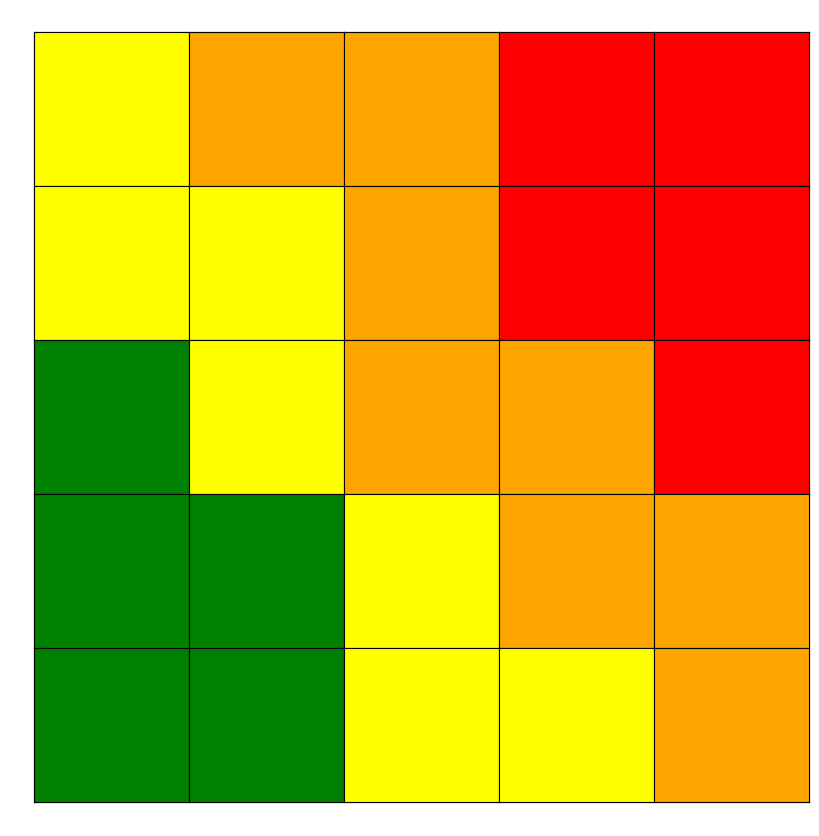

In [84]:
#https://stackoverflow.com/questions/62154079/risk-matrix-with-pythyon

fig = plt.figure()
fig.set_size_inches(10, 10)
plt.subplots_adjust(wspace=0, hspace=0)
plt.xticks([])
plt.yticks([])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('   ')
plt.ylabel('   ')
plt.title('   ')

#This example is for a 5 * 5 matrix
nrows=5
ncols=5
axes = [fig.add_subplot(nrows, ncols, r * ncols + c + 1) for r in range(0, nrows) for c in range(0, ncols) ]

# remove the x and y ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)

#Add background colors
#This has been done manually for more fine-grained control
#Run the loop below to identify the indice of the axes

#Identify the index of the axes
#for i in range(len(axes)):
#    axes[i].text(0,0, i)

green = [10, 15, 16, 20 , 21] #Green boxes
yellow = [0, 5, 6, 11, 17, 22, 23] #yellow boxes
orange = [1 , 2, 7, 12, 13, 18, 19, 24] # orange boxes
red = [3, 4, 8, 9, 14] #red boxes

for _ in green:
    
    axes[_].set_facecolor('green')

for _ in yellow:
    axes[_].set_facecolor('yellow')

for _ in orange:
    axes[_].set_facecolor('orange')

for _ in red:
    axes[_].set_facecolor('red')

show_box_labels = False
if show_box_labels:
    #Add labels to the Green boxes
    axes[10].text(0.1,0.8, '4')
    axes[15].text(0.1,0.8, '2')
    axes[20].text(0.1,0.8, '1')
    axes[16].text(0.1,0.8, '5')
    axes[21].text(0.1,0.8, '3')

    #Add labels to the Yellow boxes
    axes[0].text(0.1,0.8, '11')
    axes[5].text(0.1,0.8, '7')
    axes[6].text(0.1,0.8, '12')
    axes[11].text(0.1,0.8, '8')
    axes[17].text(0.1,0.8, '9')
    axes[22].text(0.1,0.8, '6')
    axes[23].text(0.1,0.8, '10')

    #Add lables to the Orange boxes
    axes[1].text(0.1,0.8, '16')
    axes[2].text(0.1,0.8, '20')
    axes[7].text(0.1,0.8, '17')
    axes[12].text(0.1,0.8, '13')
    axes[13].text(0.1,0.8, '18')
    axes[18].text(0.1,0.8, '14')
    axes[19].text(0.1,0.8, '19')
    axes[24].text(0.1,0.8, '15')

    #Add lables to the Red Boxes
    axes[3].text(0.1,0.8, '23')
    axes[8].text(0.1,0.8, '21')
    axes[4].text(0.1,0.8, '25')
    axes[9].text(0.1,0.8, '24')
    axes[14].text(0.1,0.8, '22')

#Plot some random data
#for _ in range(len(axes)):
#    axes[_].text(5.2,5.2, _)
#    axes[_].add_patch(plt.Circle((5, 5), 0.1, color='b'))
#       axes[_].plot(np.random.uniform(2, 4, 5), np.random.uniform(2,4,5), '.')
#plt.legend(legend_text,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig('background.png')

0
1 9.0
1
4 8.0
2
2 7.0
3
5 8.5
4
5 8.0
5
1 1.0
6
2 3.0
7
3 2.0
8
4 3.0
9
7 7.0
10
5 5.0
11
9 9.0


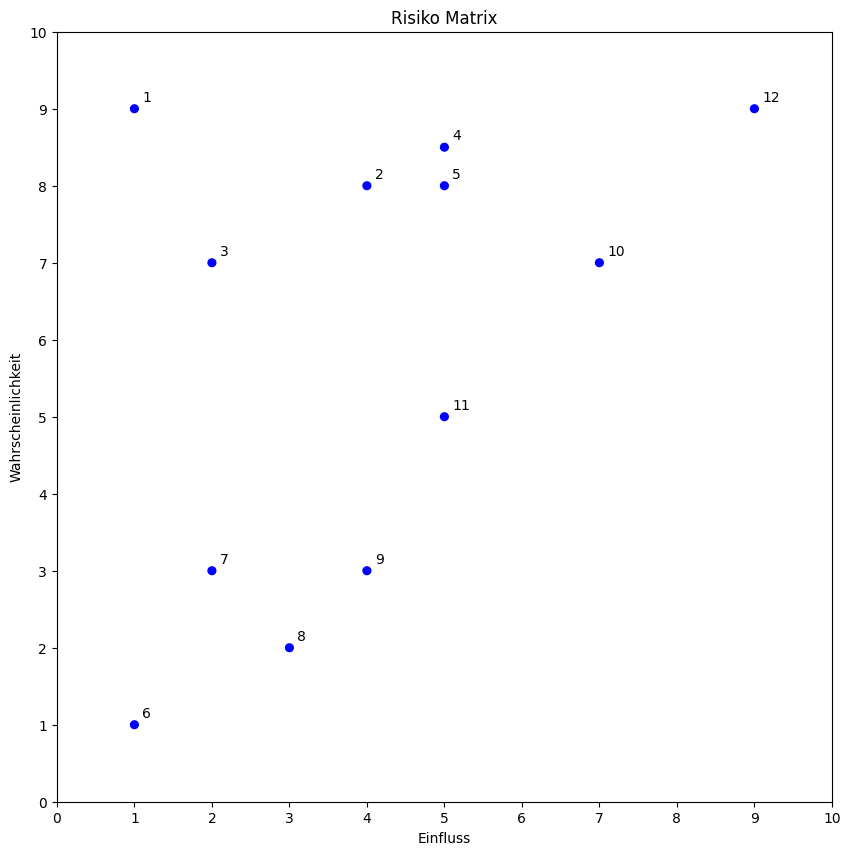

In [85]:
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.subplots_adjust(wspace=0, hspace=0)
plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,11))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Einfluss')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Risiko Matrix')

x_pos = df["x"].to_numpy()
y_pos = df["y"].to_numpy()
for i in range(len(x_pos)):
    print(i)
    print(x_pos[i],y_pos[i])
    plt.text(x_pos[i]+0.1,y_pos[i]+0.1,row_ids[i])
    circle1 = plt.Circle((x_pos[i],y_pos[i]), 0.05, color='b')
    plt.gca().add_patch(circle1)
    legend_text.append(str(row_ids[i]) + " - " + str(names[i]))
#plt.show()
#fig.savefig("data1.png")
#plt.legend(legend_text,loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=2)
fig.savefig('data.png', transparent=True)







In [86]:
import cv2
background = cv2.imread("background.png", cv2.IMREAD_UNCHANGED)
foreground = cv2.imread("data.png", cv2.IMREAD_UNCHANGED)

print(background.shape)
print(foreground.shape)

# normalize alpha channels from 0-255 to 0-1
alpha_background = background[:,:,3] / 255.0
alpha_foreground = foreground[:,:,3] / 255.0
# set adjusted colors
for color in range(0, 3):
    background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
        alpha_background * background[:,:,color] * (1 - alpha_foreground)

# set adjusted alpha and denormalize back to 0-255
background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255

# display the image
cv2.imwrite("riskmatrix.png",background)
cv2.imshow("Composited image", background)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1000, 1000, 4)
(1000, 1000, 4)


In [87]:
#increase image horizontally and add legend
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

height = background.shape[1]
added_pixels = 70 + len(max(legend_text)) * 10
print(added_pixels)
print(height, height//2)


width = background.shape[1]+added_pixels
blank_image = np.zeros((height,width,4), np.uint8)
blank_image.fill(255)
blank_image[0:background.shape[1],0:background.shape[0],:]=background[:,:,:]
cv2.imwrite("riskmatrix_pre.png",blank_image)

cv2.imshow("image", cv2.imread("riskmatrix_pre.png", cv2.IMREAD_UNCHANGED))
cv2.waitKey(0)
cv2.destroyAllWindows()
x_off = 950
y_off = 250

img = Image.open("riskmatrix_pre.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('C:\Windows\Fonts\Arial.ttf', 14)
for i in range(len(row_ids)):
    print(legend_text[i])
    print(len(legend_text[i]))
    #cv2.putText(blank_image,legend_text[i],(x_off,y_off + i*40),cv2.FONT_ITALIC,0.7,(0, 0, 0),1,cv2.LINE_AA)
    draw.text((x_off,y_off + i*32),legend_text[i],(0,0,0),font=font) # this will draw text with Blackcolor and 16 size

img.save('riskmatrix.png')


cv2.imshow("image", cv2.imread("riskmatrix.png", cv2.IMREAD_UNCHANGED))
cv2.waitKey(0)
cv2.destroyAllWindows()

#for i in range(len(row_ids)):
#    print(legend_text[i])
#    print(len(legend_text[i]))
#    cv2.putText(blank_image,legend_text[i],(x_off,y_off + i*40),cv2.FONT_ITALIC,0.7,(0, 0, 0),1,cv2.LINE_AA)

#cv2.imshow("image", blank_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

220
1000 500
1 - RSA Key Length
18
2 - Keine Firewall
18
3 - Keine VLANs
15
4 - kein HTTPS
14
5 - Platzhalter
15
6 - Platzhalter
15
7 - Platzhalter
15
8 - Platzhalter
15
9 - Platzhalter
15
10 - PlatzhalterS
17
11 - Platzhalter
16
12 - Platzhalter
16
